# Part one regression:

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgawlik/nyse")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nyse


In [2]:
import pandas as pd

prices = pd.read_csv("/kaggle/input/nyse/prices.csv")
prices_split_adjusted = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv")
securities = pd.read_csv("/kaggle/input/nyse/securities.csv")
fundamentals = pd.read_csv("/kaggle/input/nyse/fundamentals.csv")

In [3]:
# Display the first few rows of each dataset
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# Display the first few rows of each dataset
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [5]:
# Display the first few rows of each dataset
fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [6]:
# Display the first few rows of each dataset
prices_split_adjusted.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
# Check the data types, summary statistics, and missing values.
print(prices.info())
print(prices.describe())
print(prices.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
None
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%    

In [8]:
# securities
# Check the data types, summary statistics, and missing values.
print(securities.info())
print(securities.describe())
print(securities.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB
None
                CIK
count  5.050000e+02
mean   7.074490e+05
std    5.144375e+05
min    1.800000e+03
25%    8.631200e+04
50%    8.310010e+05
75%    1.075531e+06
max    1.659166e+06
Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS S

In [9]:
# fundamentals
# Check the data types, summary statistics, and missing values.
print(fundamentals.info())
print(fundamentals.describe())
print(fundamentals.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [10]:
# Check the data types, summary statistics, and missing values.
print(prices_split_adjusted.info())
print(prices_split_adjusted.describe())
print(prices_split_adjusted.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
None
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%    

In [11]:
fundamentals['Cash Ratio'].fillna(fundamentals['Cash Ratio'].mean(), inplace=True)

/tmp/ipykernel_30/2960929335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fundamentals['Cash Ratio'].fillna(fundamentals['Cash Ratio'].mean(), inplace=True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


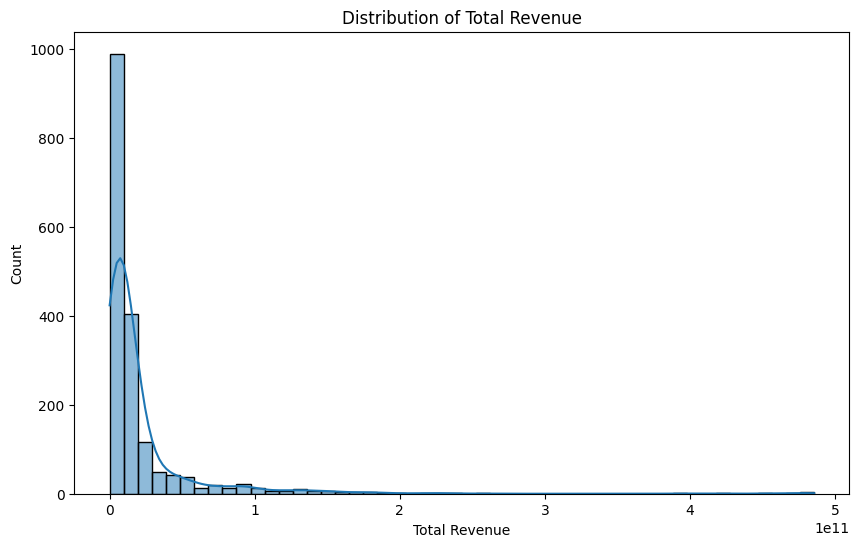

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(fundamentals['Total Revenue'].dropna(), bins=50, kde=True)
plt.title('Distribution of Total Revenue')
plt.show()


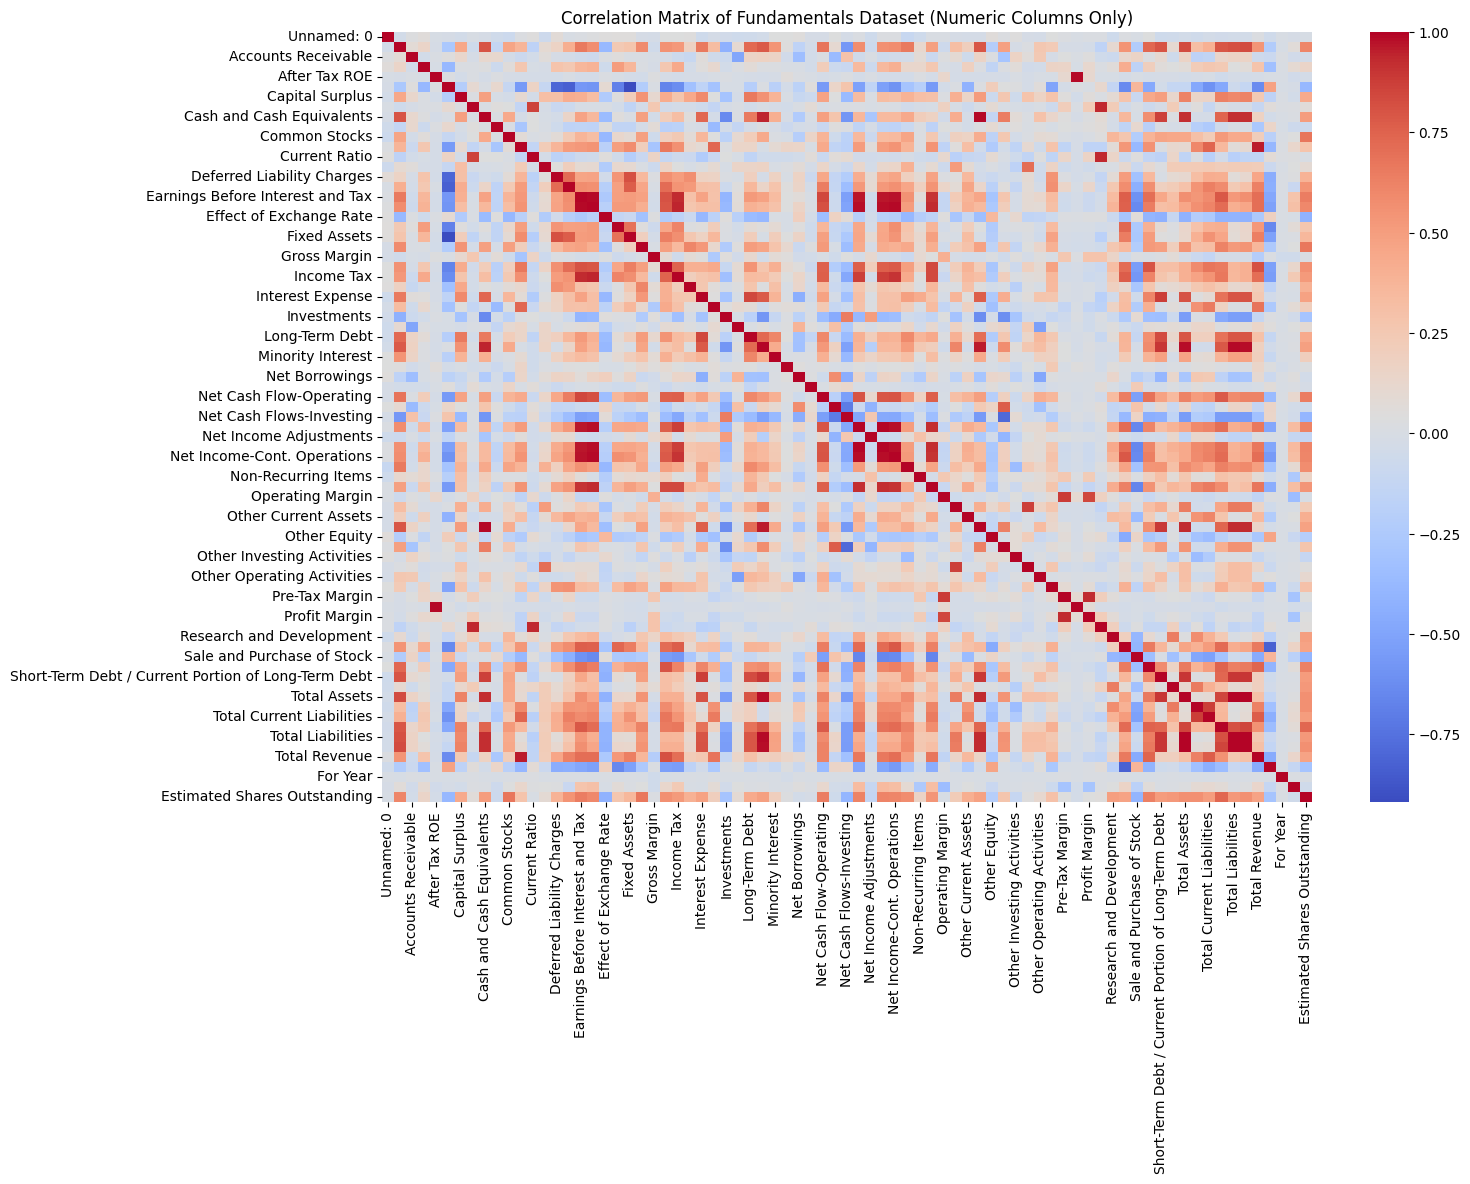

In [13]:
import numpy as np
# Select only numeric columns from the fundamentals DataFrame
numeric_fundamentals = fundamentals.select_dtypes(include=[np.number])

# Now generate the heatmap with the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_fundamentals.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Fundamentals Dataset (Numeric Columns Only)')
plt.show()


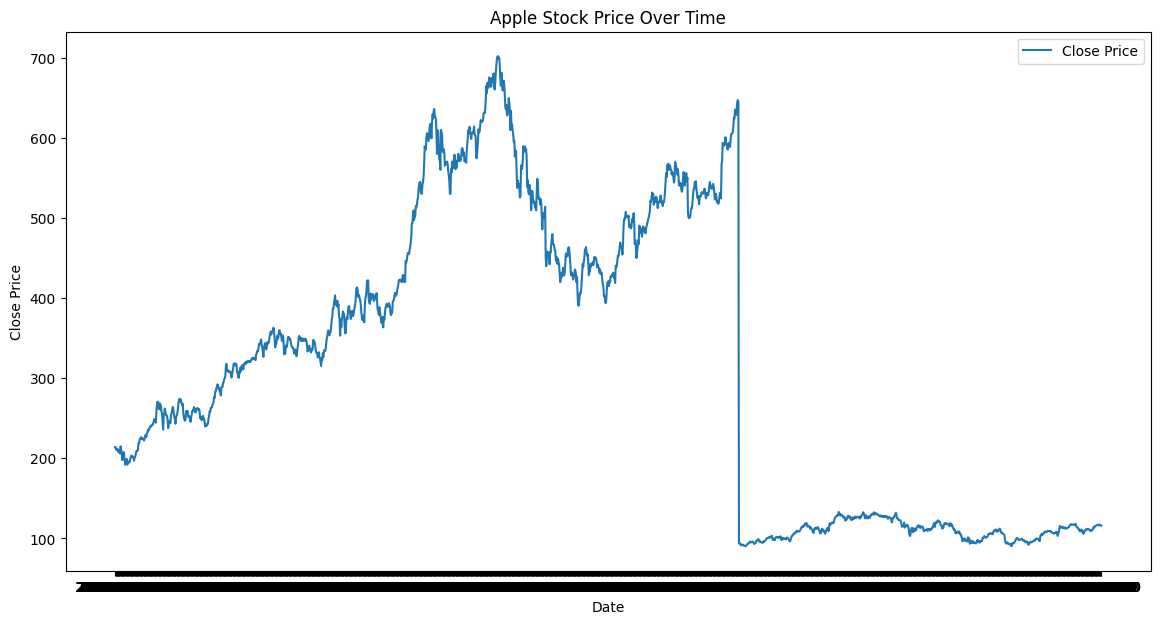

In [14]:
sample_stock = prices[prices['symbol'] == 'AAPL']  # Example for Apple
plt.figure(figsize=(14, 7))
plt.plot(sample_stock['date'], sample_stock['close'], label='Close Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


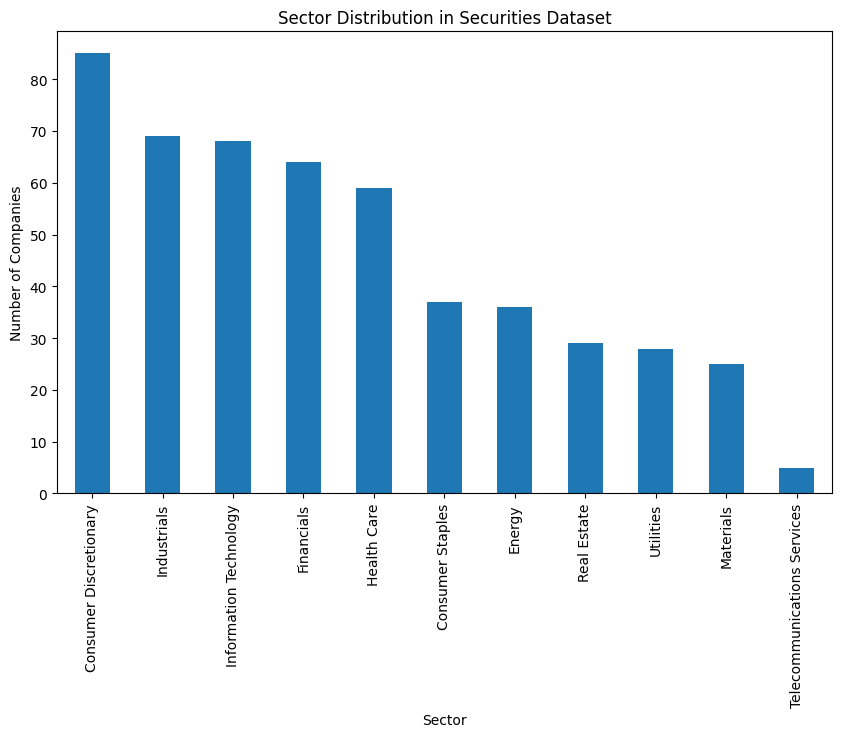

In [15]:
plt.figure(figsize=(10, 6))
securities['GICS Sector'].value_counts().plot(kind='bar')
plt.title('Sector Distribution in Securities Dataset')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
features = prices[['open', 'low', 'high', 'volume']]
target = prices['close']

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
import torch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [17]:
import torch.nn as nn

# Define a simple feedforward neural network
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize model with example hyperparameters (these will be tuned in step 3)
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = RegressionModel(input_size, hidden_size, output_size)


Epoch 1/20 - Train Loss: 0.7371, Train Accuracy: 0.4600, Test Loss: 0.7476, Test Accuracy: 0.4333
Epoch 2/20 - Train Loss: 0.7354, Train Accuracy: 0.4600, Test Loss: 0.7458, Test Accuracy: 0.4333
Epoch 3/20 - Train Loss: 0.7338, Train Accuracy: 0.4600, Test Loss: 0.7439, Test Accuracy: 0.4333
Epoch 4/20 - Train Loss: 0.7322, Train Accuracy: 0.4600, Test Loss: 0.7421, Test Accuracy: 0.4333
Epoch 5/20 - Train Loss: 0.7306, Train Accuracy: 0.4600, Test Loss: 0.7404, Test Accuracy: 0.4333
Epoch 6/20 - Train Loss: 0.7291, Train Accuracy: 0.4600, Test Loss: 0.7386, Test Accuracy: 0.4333
Epoch 7/20 - Train Loss: 0.7276, Train Accuracy: 0.4600, Test Loss: 0.7369, Test Accuracy: 0.4333
Epoch 8/20 - Train Loss: 0.7262, Train Accuracy: 0.4600, Test Loss: 0.7352, Test Accuracy: 0.4333
Epoch 9/20 - Train Loss: 0.7247, Train Accuracy: 0.4600, Test Loss: 0.7335, Test Accuracy: 0.4333
Epoch 10/20 - Train Loss: 0.7233, Train Accuracy: 0.4600, Test Loss: 0.7318, Test Accuracy: 0.4333
Epoch 11/20 - Train

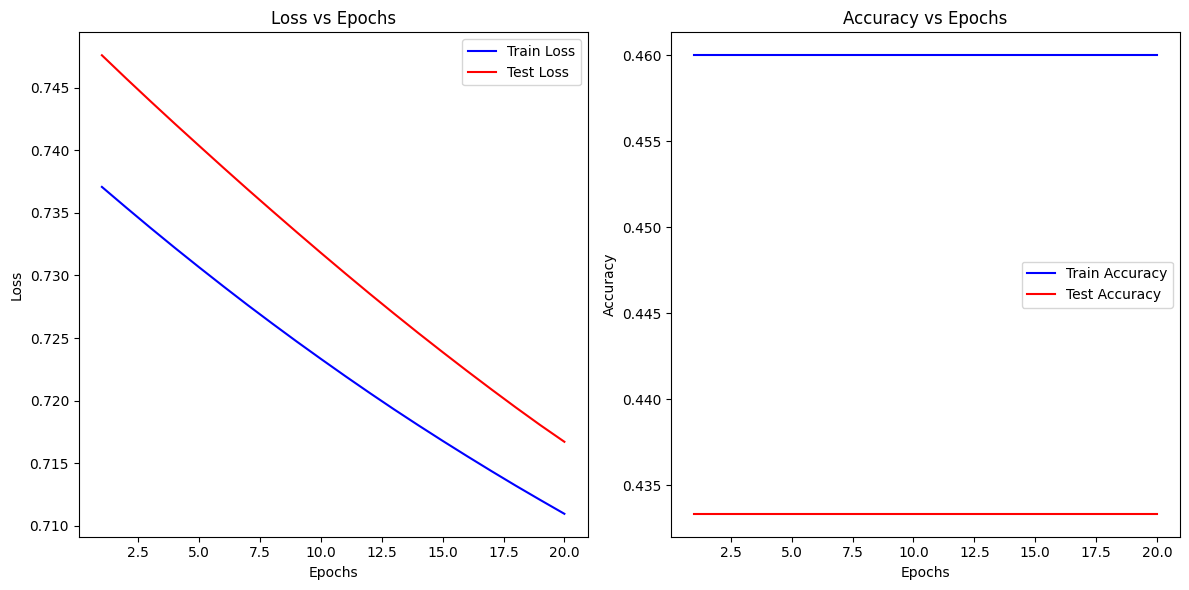

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Example model (adjust as necessary)
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train the model
def train_model(model, X_train, y_train, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_train.numpy(), predicted.numpy())
    return loss.item(), accuracy

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, criterion):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        loss = criterion(outputs, y_test)
    
    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
    return loss.item(), accuracy

# Load your dataset and prepare the data (modify this as needed)
# Example data
import numpy as np
X_train = torch.tensor(np.random.rand(100, 4), dtype=torch.float32)  # Example 100 samples, 4 features
y_train = torch.tensor(np.random.randint(0, 2, size=(100,)), dtype=torch.long)  # Binary classification
X_test = torch.tensor(np.random.rand(30, 4), dtype=torch.float32)  # Example 30 test samples
y_test = torch.tensor(np.random.randint(0, 2, size=(30,)), dtype=torch.long)  # Binary classification

# Initialize the model, optimizer, and loss function
input_size = 4
hidden_size = 10
output_size = 2  # For binary classification
model = SimpleNN(input_size, hidden_size, output_size)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Number of epochs
num_epochs = 20

# Lists to store loss and accuracy for each epoch
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_model(model, X_train, y_train, optimizer, criterion)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    test_loss, test_accuracy = evaluate_model(model, X_test, y_test, criterion)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot Loss vs Epochs
plt.figure(figsize=(12, 6))

# Plot training loss and test loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", color='blue')
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()

# Plot training accuracy and test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Train Accuracy", color='blue')
plt.plot(range(1, num_epochs+1), test_accuracies, label="Test Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Modify the training function to return loss and accuracy
def train_model_with_metrics(model, learning_rate, optimizer_name, epochs, X_train, y_train, weight_decay=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
    
    return train_losses

# Train models and collect loss values
simple_model_losses = train_model_with_metrics(simple_model, learning_rate=0.01, optimizer_name='Adam', epochs=100, X_train=torch.tensor(X_train_np, dtype=torch.float32), y_train=torch.tensor(y_train_np, dtype=torch.float32))
regularized_model_losses = train_model_with_metrics(regularized_model, learning_rate=0.01, optimizer_name='Adam', epochs=100, X_train=torch.tensor(X_train_np, dtype=torch.float32), y_train=torch.tensor(y_train_np, dtype=torch.float32))

# Plotting Loss vs Epochs
plt.plot(simple_model_losses, label='Simple Model')
plt.plot(regularized_model_losses, label='Regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Simple and Regularized Models')
plt.legend()
plt.show()


Training Original...
Epoch 1/20 - Original Train Loss: 0.7131, Train Accuracy: 0.5000, Test Loss: 0.6624, Test Accuracy: 0.6333
Epoch 2/20 - Original Train Loss: 0.7122, Train Accuracy: 0.5000, Test Loss: 0.6626, Test Accuracy: 0.6333
Epoch 3/20 - Original Train Loss: 0.7114, Train Accuracy: 0.5000, Test Loss: 0.6628, Test Accuracy: 0.6333
Epoch 4/20 - Original Train Loss: 0.7105, Train Accuracy: 0.5000, Test Loss: 0.6630, Test Accuracy: 0.6333
Epoch 5/20 - Original Train Loss: 0.7097, Train Accuracy: 0.5000, Test Loss: 0.6633, Test Accuracy: 0.6333
Epoch 6/20 - Original Train Loss: 0.7088, Train Accuracy: 0.5000, Test Loss: 0.6635, Test Accuracy: 0.6333
Epoch 7/20 - Original Train Loss: 0.7080, Train Accuracy: 0.5000, Test Loss: 0.6638, Test Accuracy: 0.6333
Epoch 8/20 - Original Train Loss: 0.7072, Train Accuracy: 0.5000, Test Loss: 0.6641, Test Accuracy: 0.6333
Epoch 9/20 - Original Train Loss: 0.7064, Train Accuracy: 0.5000, Test Loss: 0.6644, Test Accuracy: 0.6333
Epoch 10/20 - Or

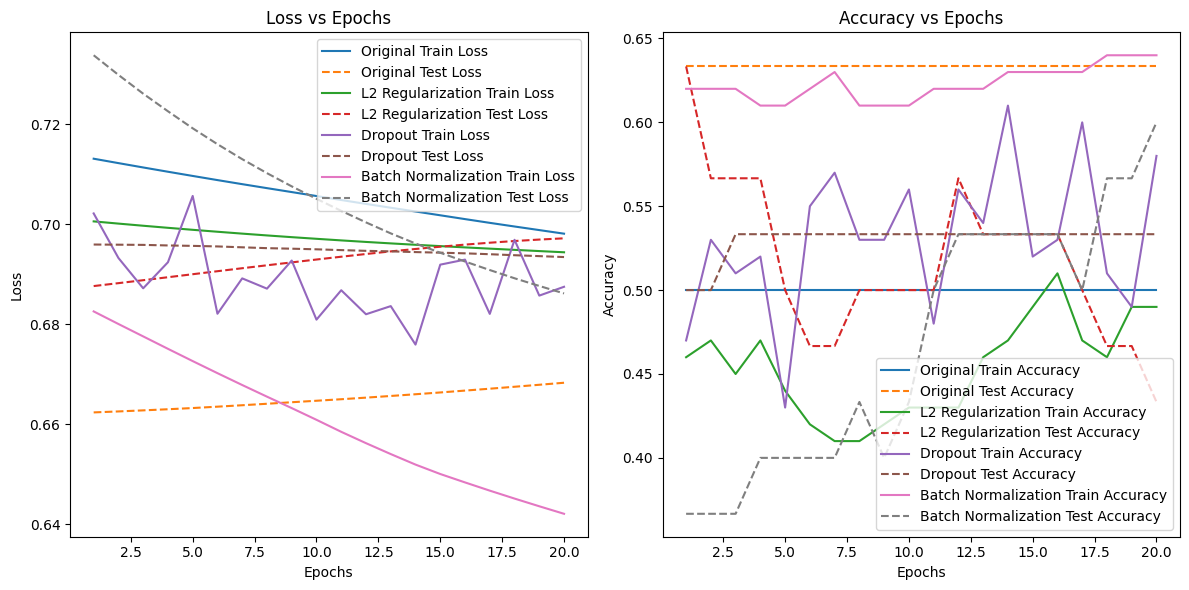

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Original Model (no regularization)
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model with L2 Regularization (Weight Decay)
class SimpleNN_L2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model with Dropout Regularization
class SimpleNN_Dropout(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(SimpleNN_Dropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Dropout applied
        x = self.fc2(x)
        return x

# Model with Batch Normalization
class SimpleNN_BN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN_BN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Normalization
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)  # Batch Normalization applied
        x = self.fc2(x)
        return x

# Function to train the model
def train_model(model, X_train, y_train, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_train.numpy(), predicted.numpy())
    return loss.item(), accuracy

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, criterion):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        loss = criterion(outputs, y_test)
    
    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
    return loss.item(), accuracy

# Load your dataset and prepare the data (modify this as needed)
# Example data
import numpy as np
X_train = torch.tensor(np.random.rand(100, 4), dtype=torch.float32)  # Example 100 samples, 4 features
y_train = torch.tensor(np.random.randint(0, 2, size=(100,)), dtype=torch.long)  # Binary classification
X_test = torch.tensor(np.random.rand(30, 4), dtype=torch.float32)  # Example 30 test samples
y_test = torch.tensor(np.random.randint(0, 2, size=(30,)), dtype=torch.long)  # Binary classification

# Number of epochs
num_epochs = 20

# Initialize the models
input_size = 4
hidden_size = 10
output_size = 2  # For binary classification

models = {
    'Original': SimpleNN(input_size, hidden_size, output_size),
    'L2 Regularization': SimpleNN_L2(input_size, hidden_size, output_size),
    'Dropout': SimpleNN_Dropout(input_size, hidden_size, output_size, dropout_rate=0.5),
    'Batch Normalization': SimpleNN_BN(input_size, hidden_size, output_size)
}

# Initialize optimizer and loss function
optimizer = optim.Adam
criterion = nn.CrossEntropyLoss()

# Store the results for each model
results = {}

# Training loop for each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    model = model  # Reset model to its original state
    optimizer_instance = optimizer(model.parameters(), lr=0.001)
    
    # Lists to store loss and accuracy for each epoch
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        train_loss, train_accuracy = train_model(model, X_train, y_train, optimizer_instance, criterion)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        test_loss, test_accuracy = evaluate_model(model, X_test, y_test, criterion)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - {model_name} Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    results[model_name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies
    }

# Plotting Loss and Accuracy for each model
plt.figure(figsize=(12, 6))

# Plot loss comparison
plt.subplot(1, 2, 1)
for model_name in models.keys():
    plt.plot(range(1, num_epochs + 1), results[model_name]['train_losses'], label=f"{model_name} Train Loss")
    plt.plot(range(1, num_epochs + 1), results[model_name]['test_losses'], label=f"{model_name} Test Loss", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()

# Plot accuracy comparison
plt.subplot(1, 2, 2)
for model_name in models.keys():
    plt.plot(range(1, num_epochs + 1), results[model_name]['train_accuracies'], label=f"{model_name} Train Accuracy")
    plt.plot(range(1, num_epochs + 1), results[model_name]['test_accuracies'], label=f"{model_name} Test Accuracy", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.tight_layout()
plt.show()


# Part two multi class classification:

In [28]:
# Import the dataset
path = kagglehub.dataset_download("shivamb/machine-predictive-maintenance-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/machine-predictive-maintenance-classification


In [60]:
import pandas as pd

df = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [62]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [63]:
df.dropna(inplace=True)
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values for 'Type' column
imputer = SimpleImputer(strategy='most_frequent')
df['Type'] = imputer.fit_transform(df[['Type']]).ravel()  # Flattening the 2D output

# Encode categorical columns
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Standardize/Normalize numerical columns
scaler = StandardScaler()
numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         1.000000e+04             1.000000e+04   
mean    5000.50000        -9.322321e-16            -1.693934e-15   
std     2886.89568         1.000050e+00             1.000050e+00   
min        1.00000        -2.352278e+00            -2.901986e+00   
25%     2500.75000        -8.523974e-01            -8.125581e-01   
50%     5000.50000         4.753123e-02             6.365340e-02   
75%     7500.25000         7.474757e-01             7.376623e-01   
max    10000.00000         2.247357e+00             2.557486e+00   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  \
count            1.000000e+04  1.000000e+04     1.000000e+04  10000.000000   
mean            -2.330580e-16  5.424994e-16     1.051603e-16      0.033900   
std              1.000050e+00  1.000050e+00     1.000050e+00      0.180981   
min             -2.068196e+00 -3.630149e+00    -1.695984e+00      0.000000 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


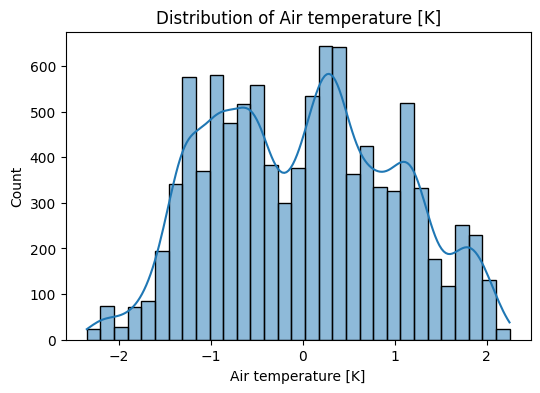

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


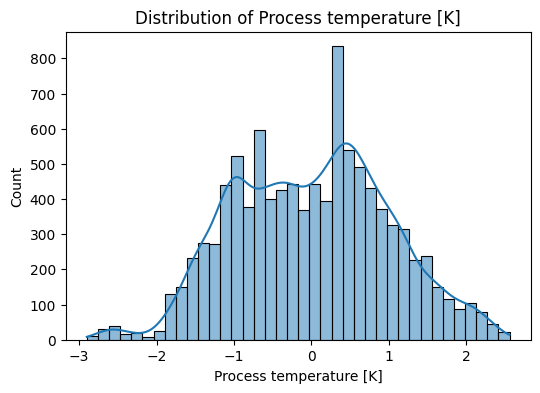

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


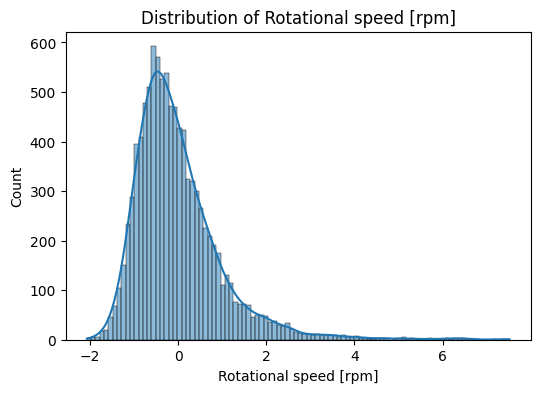

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


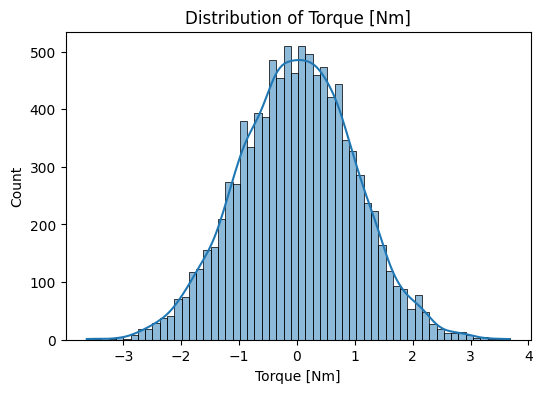

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


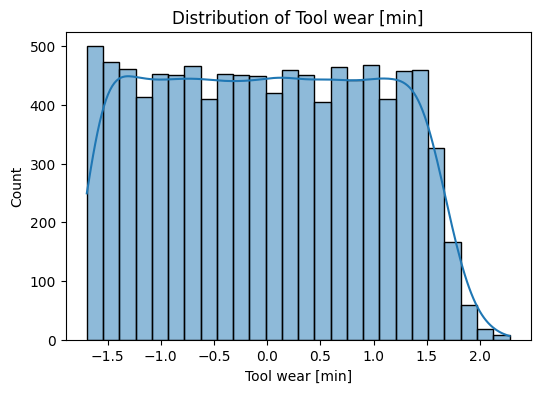

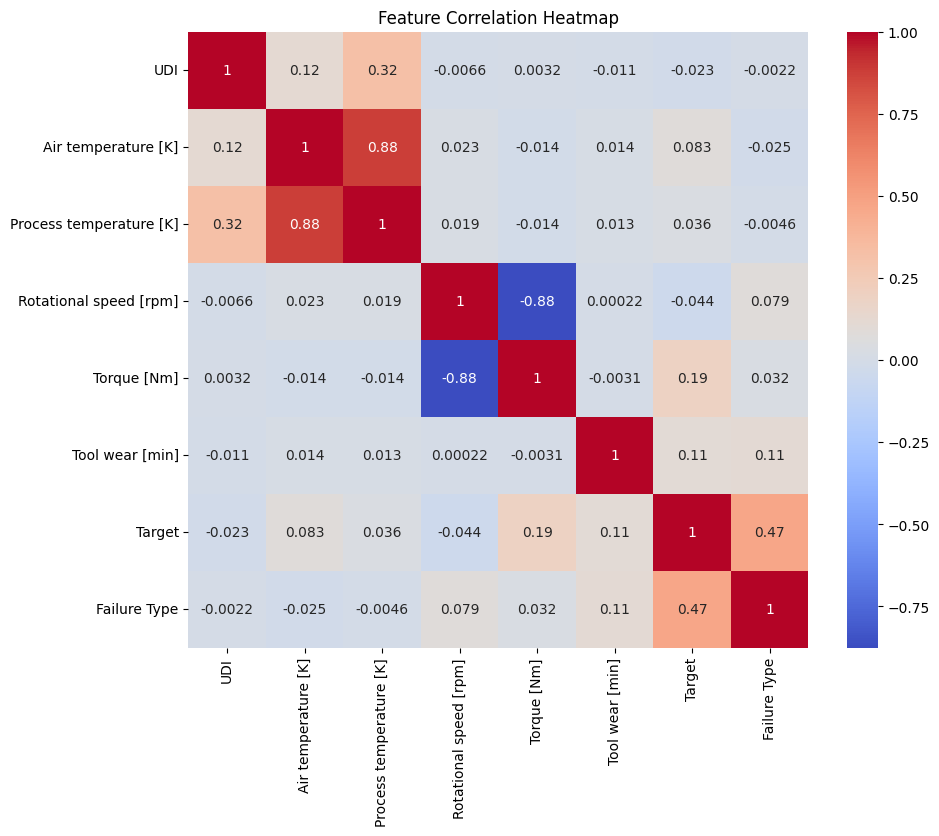

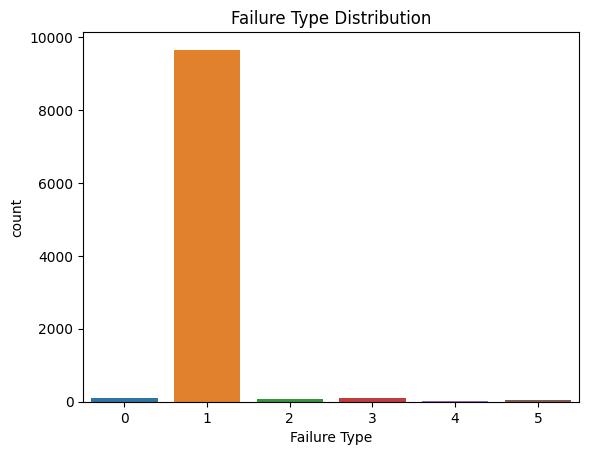

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print(df.describe())

# Distribution plots for numerical features
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Failure type analysis
sns.countplot(data=df, x='Failure Type')
plt.title('Failure Type Distribution')
plt.show()


In [71]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assume 'Product ID' is a non-numeric column and does not need to be part of the feature set
X = df.drop(['Failure Type', 'Product ID'], axis=1)

# Convert categorical features to numeric
# Option 1: Label Encoding (for columns with a few categories)
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Define target
y = df['Failure Type']

# Apply SMOTE to balance classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# Define neural network architecture
class DNNClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNNClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

# Model, loss, and optimizer
input_size = X_train.shape[1]
num_classes = len(df['Failure Type'].unique())
model = DNNClassifier(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch [1/20], Loss: 1.7636
Epoch [2/20], Loss: 1.9236
Epoch [3/20], Loss: 1.7636
Epoch [4/20], Loss: 1.8836
Epoch [5/20], Loss: 1.9236
Epoch [6/20], Loss: 1.8036
Epoch [7/20], Loss: 1.9236
Epoch [8/20], Loss: 1.8836
Epoch [9/20], Loss: 1.7236
Epoch [10/20], Loss: 1.8436
Epoch [11/20], Loss: 1.8836
Epoch [12/20], Loss: 1.7636
Epoch [13/20], Loss: 1.8836
Epoch [14/20], Loss: 1.9236
Epoch [15/20], Loss: 1.8036
Epoch [16/20], Loss: 1.8836
Epoch [17/20], Loss: 1.9636
Epoch [18/20], Loss: 1.8036
Epoch [19/20], Loss: 1.8436
Epoch [20/20], Loss: 1.8036
Test Accuracy: 16.94%


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# Define a function to create the neural network model
def create_model(learning_rate=0.01, optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier for use in scikit-learn
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__optimizer': ['adam', 'sgd'],
    'epochs': [10, 50, 100],
    'batch_size': [32, 64, 128]
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", accuracy)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731428981.222441     508 service.cc:145] XLA service 0x7e22dc003e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731428981.222491     508 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731428982.225782     508 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` objec

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

# Define a function to create the neural network model
def create_model(learning_rate=0.01, optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier for use in scikit-learn
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__optimizer': ['adam', 'sgd'],
    'epochs': [10, 50, 100],
    'batch_size': [32, 64, 128]
}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Get the history of the training process
history = best_model.history

# Visualize loss during training and validation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualize accuracy during training and validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np

# Predict on training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Convert the predictions from probabilities (if needed) to binary (0/1) outcomes
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Calculate accuracy, precision, recall, F1 score, and confusion matrix for training data
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_recall = recall_score(y_train, y_train_pred_binary)
train_precision = precision_score(y_train, y_train_pred_binary)
train_f1 = f1_score(y_train, y_train_pred_binary)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_binary)

# Calculate accuracy, precision, recall, F1 score, and confusion matrix for test data
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_precision = precision_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Print out the metrics for both training and testing
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Sensitivity (Recall): {train_recall:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Training Confusion Matrix:\n{train_conf_matrix}\n")

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Sensitivity (Recall): {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Confusion Matrix:\n{test_conf_matrix}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Regularized model with L2 regularization, Dropout, and BatchNormalization
def create_regularized_model():
    model = Sequential()

    # Input layer
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))  # Dropout layer

    # Hidden layers with L2 regularization, Dropout, and BatchNormalization
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with a different optimizer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create and train the model with regularization
regularized_model = create_regularized_model()

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the regularized model
history_regularized = regularized_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the regularized model on training and test datasets
train_accuracy_reg = regularized_model.evaluate(X_train, y_train, verbose=0)
test_accuracy_reg = regularized_model.evaluate(X_test, y_test, verbose=0)

print(f"Regularized Model - Training Accuracy: {train_accuracy_reg[1]:.4f}")
print(f"Regularized Model - Test Accuracy: {test_accuracy_reg[1]:.4f}")

# Predict on training and test data
y_train_pred_reg = regularized_model.predict(X_train)
y_test_pred_reg = regularized_model.predict(X_test)

# Convert predictions to binary labels
y_train_pred_binary_reg = (y_train_pred_reg > 0.5).astype(int)
y_test_pred_binary_reg = (y_test_pred_reg > 0.5).astype(int)

# Calculate metrics for the regularized model
train_accuracy_reg = accuracy_score(y_train, y_train_pred_binary_reg)
test_accuracy_reg = accuracy_score(y_test, y_test_pred_binary_reg)

train_recall_reg = recall_score(y_train, y_train_pred_binary_reg)
test_recall_reg = recall_score(y_test, y_test_pred_binary_reg)

train_precision_reg = precision_score(y_train, y_train_pred_binary_reg)
test_precision_reg = precision_score(y_test, y_test_pred_binary_reg)

train_f1_reg = f1_score(y_train, y_train_pred_binary_reg)
test_f1_reg = f1_score(y_test, y_test_pred_binary_reg)

train_conf_matrix_reg = confusion_matrix(y_train, y_train_pred_binary_reg)
test_conf_matrix_reg = confusion_matrix(y_test, y_test_pred_binary_reg)

# Print out the metrics for the regularized model
print(f"Regularized Model - Training Accuracy: {train_accuracy_reg:.4f}")
print(f"Regularized Model - Test Accuracy: {test_accuracy_reg:.4f}")
print(f"Regularized Model - Training Sensitivity (Recall): {train_recall_reg:.4f}")
print(f"Regularized Model - Test Sensitivity (Recall): {test_recall_reg:.4f}")
print(f"Regularized Model - Training Precision: {train_precision_reg:.4f}")
print(f"Regularized Model - Test Precision: {test_precision_reg:.4f}")
print(f"Regularized Model - Training F1 Score: {train_f1_reg:.4f}")
print(f"Regularized Model - Test F1 Score: {test_f1_reg:.4f}")
print(f"Regularized Model - Training Confusion Matrix:\n{train_conf_matrix_reg}")
print(f"Regularized Model - Test Confusion Matrix:\n{test_conf_matrix_reg}")
